In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from random import shuffle

from sklearn.model_selection import train_test_split

from time import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization ,Flatten,Dense, Activation,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import confusion_matrix,classification_report

import pickle

In [2]:
#Read the data
train_data = pd.read_csv("csvTrainImages 60k x 784.csv")
train_label= pd.read_csv("csvTrainLabel 60k x 1.csv")

test_data=pd.read_csv("csvTestImages 10k x 784.csv")
test_label=pd.read_csv("csvTestLabel 10k x 1.csv")


#Drop unwanted images 
with open("unwanted_train_images.txt", "rb") as file:   
    unwanted = pickle.load(file)
    
train_data.drop(unwanted, axis=0, inplace=True)
train_label.drop(unwanted, axis=0, inplace=True)

with open("unwanted_test_images.txt", "rb") as file:   
    unwanted = pickle.load(file)
    
test_data.drop(unwanted, axis=0, inplace=True)
test_label.drop(unwanted, axis=0, inplace=True)


#prepare data for modeling
x_train=np.array(train_data)
x_test=np.array(test_data)

y_train=np.array(train_label)
y_test=np.array(test_label)

fun = lambda row : row.reshape(28,28).transpose()

def transform(arr):
    arr=arr/255.0
    return np.apply_along_axis(fun,1,arr)

x_train=transform(x_train)
x_test=transform(x_test)

shuffle_ind=[i for i in range(x_train.shape[0])]
shuffle(shuffle_ind)

x_train=x_train[shuffle_ind]
y_train=y_train[shuffle_ind]

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(y_test.shape[0],28,28,1)

y_train = np.array(pd.get_dummies(pd.DataFrame(y_train), columns=[0]))
y_test =  np.array(pd.get_dummies(pd.DataFrame(y_test), columns=[0]))

In [3]:
#split the data
x_train, x_val,y_train, y_val=train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

In [4]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 5,
                                            verbose = 1,
                                            factor = 0.8,
                                            min_lr = 0.00001)

In [5]:
def model_6():
    model = Sequential()

    model.add(Conv2D(32, (5,5), input_shape=(28, 28, 1),padding="same"))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(64,  (5,5) , padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.20))

    model.add(Conv2D(64, (3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())


    model.add(Conv2D(64,  (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.20))

    model.add(Flatten())

    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model    

In [6]:
t0 = time()
model6= model_6()
hist1 = model6.fit(x=x_train, y=y_train, batch_size=64, epochs=80, validation_data=(x_val,y_val) ,callbacks=[learning_rate_reduction])
print('time= ',time() - t0)

Epoch 1/80
836/836 [==============================] - 186s 223ms/step - loss: 0.0767 - accuracy: 0.9774 - val_loss: 0.0158 - val_accuracy: 0.9953
Epoch 2/80
836/836 [==============================] - 181s 216ms/step - loss: 0.0220 - accuracy: 0.9936 - val_loss: 0.0154 - val_accuracy: 0.9946
Epoch 3/80
836/836 [==============================] - 203s 243ms/step - loss: 0.0180 - accuracy: 0.9946 - val_loss: 0.0130 - val_accuracy: 0.9956
Epoch 4/80
836/836 [==============================] - 197s 236ms/step - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.0057 - val_accuracy: 0.9992
Epoch 5/80
836/836 [==============================] - 196s 234ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0124 - val_accuracy: 0.9966
Epoch 6/80
836/836 [==============================] - 197s 236ms/step - loss: 0.0123 - accuracy: 0.9963 - val_loss: 0.0145 - val_accuracy: 0.9953
Epoch 7/80
836/836 [==============================] - 195s 233ms/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.0109 -

In [7]:
model6.evaluate(x_test, y_test)

311/311 [==============================] - 4s 14ms/step - loss: 0.0447 - accuracy: 0.9943


[0.04468304663896561, 0.9942708015441895]

<AxesSubplot:>

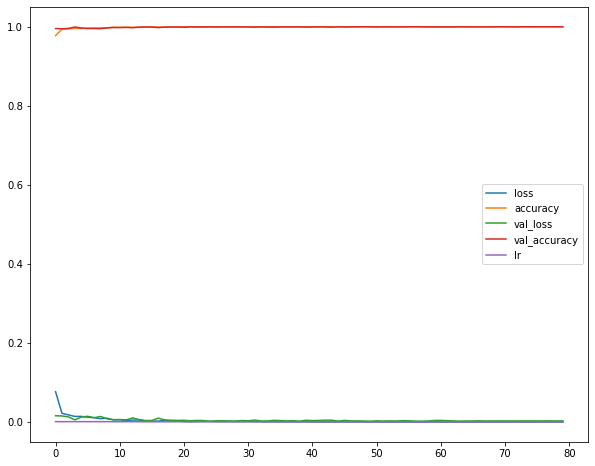

In [8]:
pd.DataFrame(hist1.history).plot(figsize=(10,8))

In [14]:
model6.save('model6_5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model6_5\assets


In [6]:
model6=tf.keras.models.load_model('model6_5')

### The dataset here  is created by me to test the model and evaluate the chosen one

In [3]:
data=pd.read_csv('data.csv')
data.drop('Unnamed: 0', axis=1, inplace= True)

shuffle_ind=[i for i in range(data.shape[0])]
shuffle(shuffle_ind)

x= np.array(data.drop(columns='class', axis=1))
y= np.array(data['class'])

x=x.reshape(y.shape[0],28,28,1)
y=np.array(pd.get_dummies(pd.DataFrame(y), columns=[0]))

In [7]:
model6.evaluate(x, y)

18/18 [==============================] - 0s 18ms/step - loss: 0.5737 - accuracy: 0.8831


[0.5737398266792297, 0.8830715417861938]

In [18]:
from sklearn.metrics import log_loss
log_loss(data['class'],model6.predict(x))

0.839613471923596

In [4]:
model6=tf.keras.models.load_model('model6_5')

pred=np.argmax(model6.predict(x),axis=1)
actual=np.argmax(y, axis=1)

print(model6.evaluate(x,y))

print()
print()

matrix = confusion_matrix(actual, pred)
print(matrix)
print()
print()

m1_report= classification_report(actual, pred)
print(m1_report)


18/18 [==============================] - 0s 19ms/step - loss: 0.5737 - accuracy: 0.8831
[0.5737398266792297, 0.8830715417861938]


[[59  2  1  0  1  0  1  1  0  0]
 [ 1 29  1  0  0  0  0  1  1  0]
 [ 1  0 40  0  3  0  0  0  4  1]
 [ 0  1  0 42  0  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  0  0  0]
 [ 1  0  5  0  3 48  0  7  1  0]
 [ 0  3  1  0  0  0 65  4  5  0]
 [ 0  0  0  0  0  0  0 62  0  0]
 [ 0  0  0  0  0  0  0  0 52  0]
 [ 0  5  0  0  0  2  2  5  3 56]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        65
           1       0.72      0.88      0.79        33
           2       0.83      0.82      0.82        49
           3       1.00      0.98      0.99        43
           4       0.88      1.00      0.94        53
           5       0.96      0.74      0.83        65
           6       0.96      0.83      0.89        78
           7       0.78      1.00      0.87        62
           8       0.79      1.00      0.88      